In [65]:
import pandas as pd
%matplotlib inline
from scipy.misc import imread
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample
xray_dir = '/Volumes/dattran/xray/'
# https://elitedatascience.com/imbalanced-classes
# https://github.com/dattran2346/2015lab5/blob/master/Classification.ipynb

In [5]:
df = pd.read_csv('xray.csv')
df.head()

,patient_id,image,pneumonia,follow_up,patient_age,patient_gender,view_position
0,2,00000002_000.png,False,0,81,M,PA
1,5,00000005_000.png,False,0,69,F,PA
2,5,00000005_001.png,False,1,69,F,AP
3,5,00000005_002.png,False,2,69,F,AP
4,5,00000005_003.png,False,3,69,F,PA


In [50]:
## Let display some image 
def plot_sample_xray(pneumonia=True, n=3):
    image_files = df[df.pneumonia == pneumonia].sample(n=n)
    print(image_files)
    image_files = xray_dir + image_files.image.values
    for file in image_files:
        image = cv2.imread(file)
        print(image.shape)
        plt.figure()
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])

### Let's plot some normal xray

       patient_id             image  pneumonia  follow_up  patient_age  \
55958       26820  00026820_003.png      False          3           50   
1598          795  00000795_000.png      False          0           24   
54001       25603  00025603_005.png      False          5           45   

      patient_gender view_position  
55958              F            AP  
1598               F            PA  
54001              M            PA  
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)


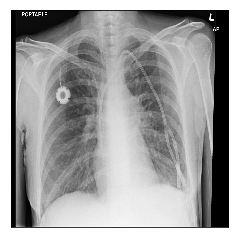

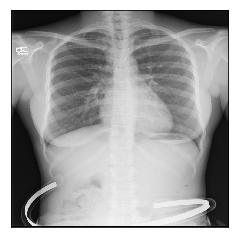

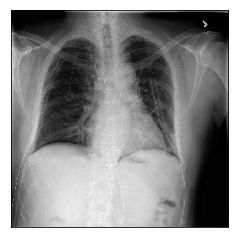

In [51]:
plot_sample_xray(pneumonia=False)

       patient_id             image  pneumonia  follow_up  patient_age  \
8909         3909  00003909_000.png       True          0           74   
3441         1629  00001629_006.png       True          6           30   
11738        5228  00005228_002.png       True          2           49   

      patient_gender view_position  
8909               F            AP  
3441               M            PA  
11738              M            PA  
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)


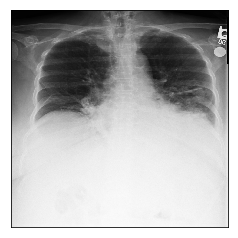

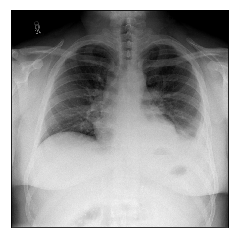

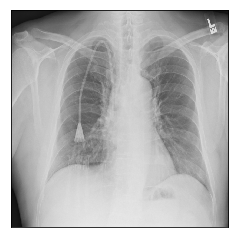

In [52]:
### Now plot some pneumonia image
plot_sample_xray(pneumonia=True)

In [76]:
### Get all the pneumonia sample
df_pneumonia = df[df.pneumonia == True]
df_normal = df[df.pneumonia == False]
print('Pneumoia patient in dataset:', df_pneumonia.shape)
print('Normal patient in dataset:', df_normal.shape)

Pneumoia patient in dataset: (1353, 7)
Normal patient in dataset: (60410, 7)


Plainly predict all the image to be normal will yield the accuracy of 99.77%, that the baseline we have to beat :)))

In [82]:
# for simplicity, consider only a small subset of images, about ~500 images for each label
n = 100
n_normal = int(100 * (1 + np.random.uniform(-0.2, 0.2)))
n_pneumonia = int(100 * (1 + np.random.uniform(-0.2, 0.2)))
print(n_normal, n_pneumonia)


101 83


In [94]:
df_pneumonia_small = df_pneumonia.sample(n=n_pneumonia)
df_normal_small = df_normal.sample(n=n_normal)
images_pneumonia = [cv2.imread(xray_dir + file).reshape(-1, 1).squeeze() for file in df_pneumonia_small.image.values]
images_normal = [cv2.imread(xray_dir + file).reshape(-1, 1).squeeze() for file in df_normal_small.image.values]
print(images_pneumonia[0].shape)

(3145728,)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60)
images = images_normal + images_pneumonia
X = pca.fit_transform(images)

In [ ]:
print(pca.explained_variance_ratio_.sum())